# Bar plots for model comparison (31 subjects), without no bias

In [1]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Define the values of  WAIC for the models


In [2]:
D_Inv_Full1 = np.load(str('results/waic/glam_FF2019_full_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31.npy'))
D_Full1 = np.load(str('results/waic/glam_FF2019_full_individual_Dislike_NoBin_Gamma-11_NUTS_31.npy'))
#D_NoBias1 = np.load(str('results/waic/glam_FF2019_nobias_individual_Dislike_NoBin_Gamma-11_NUTS_31.npy'))
#D_Inv_NoBias1 = np.load(str('results/waic/glam_FF2019_nobias_individual_Dislike_Inv_NoBin_Gamma-11_NUTS_31.npy'))

L_Full1 = np.load(str('results/waic/glam_FF2019_full_individual_Like_NoBin_Gamma-11_NUTS_31.npy'))
#L_NoBias1 = np.load(str('results/waic/glam_FF2019_nobias_individual_Like_NoBin_Gamma-11_NUTS_31.npy'))


In [3]:
D_Inv_Full1[1][0]

1810.220350332098

In [4]:
# extract waic values
D_Inv_Full = []
D_Full = []
#D_NoBias = []
#D_Inv_NoBias = []

L_Full = []
#L_NoBias = []
for i in range(len(D_Inv_Full1)):
    D_Inv_Full.append(D_Inv_Full1[i][0]) 
    D_Full.append(D_Full1[i][0])
#    D_NoBias.append(D_NoBias1[i][0])
#    D_Inv_NoBias.append(D_Inv_NoBias1[i][0]) 
    
    L_Full.append(L_Full1[i][0]) 
#    L_NoBias.append(L_NoBias1[i][0]) 

In [5]:
# Load LOO-score
Models_WAIC = [np.mean(L_Full),np.mean(D_Inv_Full),np.mean(D_Full)]
Models_WAIC_part = [L_Full,D_Inv_Full,D_Full]

x = np.arange(len(Models_WAIC))

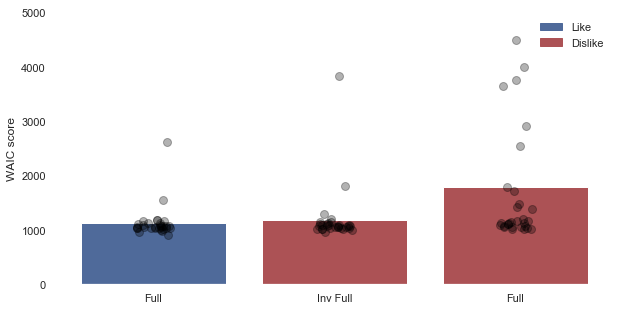

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')
plt.bar(x, Models_WAIC, color=['#4F6A9A',  '#AC5255', '#AC5255'])
plt.xticks(x, ('Full', 'Inv Full', 'Full'))
plt.ylim(0, 5000)
plt.ylabel('WAIC score')

like_patch = mpatches.Patch(color='#4F6A9A', label='Like')
dislike_patch = mpatches.Patch(color='#AC5255', label='Dislike')
leg = plt.legend(handles=[like_patch,dislike_patch])
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

for i in range(len(Models_WAIC)):
    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

plt.show()



#fig.savefig(str('SavedFigures/GLAM_individual_WAIC_ModelComparison_31.png'), dpi = 200 )

In [8]:
Models_WAIC

[1130.1755579664984, 1189.6250379584137, 1788.2677498802386]

In [21]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("data1 = "+ str(mean(data1))+ "; data2 = "+ str(mean(data2))+"; [data1 - data2] =  " + str(diff) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(p) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1,hatch='//')
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    count = 0
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)
        if data1[i] < data2[i]:
            print ("Participants with InvFull > Full: " + str(i) + '. Difference : ' + str(data1[i] - data2[i]))
            count+=1
    print ("Total number of participants with lower WAIC for " + lab1+ ' : ' + str(count))
        
    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=18)
    plt.ylabel(title, fontsize=18)
    sns.despine()

data1 = 1189.6250379584137; data2 = 1788.2677498802386; [data1 - data2] =  -598.6427119218249; t =  -3.0 ; p-value =0.005431991263270228
Participants with InvFull > Full: 0. Difference : -2594.9953018242804
Participants with InvFull > Full: 2. Difference : -34.32493243036447
Participants with InvFull > Full: 3. Difference : -1460.193263861248
Participants with InvFull > Full: 4. Difference : -432.0473886327886
Participants with InvFull > Full: 5. Difference : -18.79121566145841
Participants with InvFull > Full: 6. Difference : -14.648304633369435
Participants with InvFull > Full: 7. Difference : -14.63311042188343
Participants with InvFull > Full: 8. Difference : -148.51001748044337
Participants with InvFull > Full: 9. Difference : -27.98996276532455
Participants with InvFull > Full: 10. Difference : -1869.8777619887285
Participants with InvFull > Full: 11. Difference : -20.46631289059269
Participants with InvFull > Full: 12. Difference : -672.0323280417952
Participants with InvFull > 

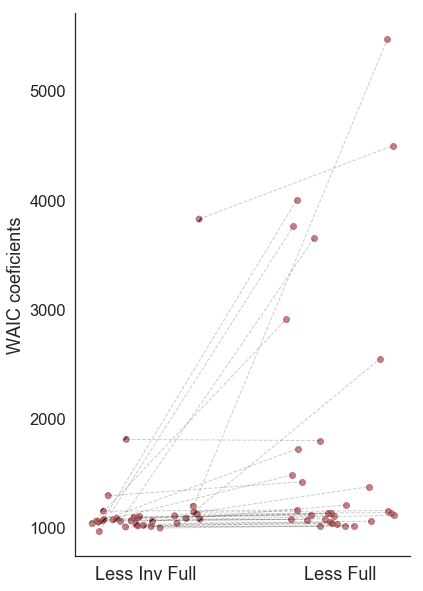

In [22]:
ttestsPlot(Models_WAIC_part[1], Models_WAIC_part[2],'#AC5255','#AC5255',"Less Inv Full",  "Less Full",title = 'WAIC coeficients')
#plt.savefig('SavedFigures/SlopesConfidenceComparison.svg', format='svg', dpi = 500 )